In [1]:
import numpy as np
import math
from sympy import *
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def TDT(T):
    b = T[0]+T[2]+2*T[3]; c = T[1]+T[2]+2*T[4]
    if b+c == 0:
        return 0
    else:
        return ((b-c)**2)/(b+c)

In [3]:
def DOLS_TDT(x,n,m):
    TG = np.zeros((m,6))
    for i in range(m):
        for j in range(n):
            TG[i][int(x[j][i])] += 1
    
    #Step 1
    MCP = np.zeros((m,6)); MCN = np.zeros((m,6)) #MaxChange
    for i in range(m):
        T = TG[i]
        X = TDT(T); MCP[i] = np.zeros(6); MCN[i] = np.zeros(6)
        if T[0] >= 1:
            Y = TDT([T[0]-1, T[1]+1, T[2], T[3], T[4], T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2]+1, T[3], T[4], T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2], T[3]+1, T[4], T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2], T[3], T[4]+1, T[5]])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
            Y = TDT([T[0]-1, T[1], T[2], T[3], T[4], T[5]+1])
            MCP[i][0] = max(MCP[i][0], Y-X); MCN[i][0] = max(MCN[i][0], X-Y)
        if T[1] >= 1:
            Y = TDT([T[0]+1, T[1]-1, T[2], T[3], T[4], T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2]+1, T[3], T[4], T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2], T[3]+1, T[4], T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2], T[3], T[4]+1, T[5]])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
            Y = TDT([T[0], T[1]-1, T[2], T[3], T[4], T[5]+1])
            MCP[i][1] = max(MCP[i][1], Y-X); MCN[i][1] = max(MCN[i][1], X-Y)
        if T[2] >= 1:
            Y = TDT([T[0]+1, T[1], T[2]-1, T[3], T[4], T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1]+1, T[2]-1, T[3], T[4], T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1], T[2]-1, T[3]+1, T[4], T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1], T[2]-1, T[3], T[4]+1, T[5]])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
            Y = TDT([T[0], T[1], T[2]-1, T[3], T[4], T[5]+1])
            MCP[i][2] = max(MCP[i][2], Y-X); MCN[i][2] = max(MCN[i][2], X-Y)
        if T[3] >= 1:
            Y = TDT([T[0]+1, T[1], T[2], T[3]-1, T[4], T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1]+1, T[2], T[3]-1, T[4], T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1], T[2]+1, T[3]-1, T[4], T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]-1, T[4]+1, T[5]])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]-1, T[4], T[5]+1])
            MCP[i][3] = max(MCP[i][3], Y-X); MCN[i][3] = max(MCN[i][3], X-Y)
        if T[4] >= 1:
            Y = TDT([T[0]+1, T[1], T[2], T[3], T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1]+1, T[2], T[3], T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1], T[2]+1, T[3], T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]+1, T[4]-1, T[5]])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3], T[4]-1, T[5]+1])
            MCP[i][4] = max(MCP[i][4], Y-X); MCN[i][4] = max(MCN[i][4], X-Y)
        if T[5] >= 1:
            Y = TDT([T[0]+1, T[1], T[2], T[3], T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1]+1, T[2], T[3], T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1], T[2]+1, T[3], T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3]+1, T[4], T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
            Y = TDT([T[0], T[1], T[2], T[3], T[4]+1, T[5]-1])
            MCP[i][5] = max(MCP[i][5], Y-X); MCN[i][5] = max(MCN[i][5], X-Y)
    #print(MCP, MCN)
    
    #Step 2
    LSS = np.zeros(int(2**m))
    for j in range(n):
        LSJ = np.zeros((m,int(2**m)))
        LSJ[0][0] = MCP[0][int(x[j][0])]; LSJ[0][1] = MCN[0][int(x[j][0])]
        #print(LSJ[0],LSJ[1])
        for i in range(1,m):
            for k in range(2**i):
                LSJ[i][2*k+0] = LSJ[i-1][k] + MCP[i][int(x[j][i])]
                LSJ[i][2*k+1] = LSJ[i-1][k] + MCN[i][int(x[j][i])]
        #print(LSJ)
        for i in range(int(2**m)):
            LSS[i] = max(LSS[i],LSJ[m-1][i])    
        #print(LSS)
        
    #Step 3
    DOLSP = np.zeros(m) #LS^{i+}
    DOLSN = np.zeros(m) #LS^{i-}
    
    for j in range(m):
        for i in range(int(2**m)):
            if int(i/(2**(m-1-j)))%2 == 0:
                DOLSP[j] = max(DOLSP[j], LSS[i])
            else:
                DOLSN[j] = max(DOLSN[j], LSS[i])
    
    return DOLSP, DOLSN

In [4]:
def h3(z,l):
    return (3*np.sqrt(3)*(l**(2/3)))/(4*math.pi*(math.fabs(z)**3+l))

def cdf(x,h,l):
    g = lambda z: h(z,l)
    return integrate.quad(g,-oo,x)

def noise(h,l,d): # using inverse transform sampling
    r = np.random.rand()
    q = 1000; z = 10
    for i in range(-50,50):
        if math.fabs(r - cdf(i/5,h,l)[0]) > q:
            z = (i-1)/5
            break
        else:
            q = min(q, math.fabs(r - cdf(i/5,h,l)[0]))
    if d == 0:
        return math.fabs(z)
    elif d == 1:
        return -math.fabs(z)
    
def alpha(k,l,m,ei): #epsilon = ei*m
    return ((l**(1/k))*(ei*m))/(2*((k-1)**((k-1)/k)))

In [5]:
def DOSS_TDT_test(n,m):
    x = np.ones((n,m))
    for j in range(m):
        while(1):
            x[:,j] = np.ones(n); T = np.zeros(6)
            for i in range(n):
                r = random.random()
                if r < 1/4:
                    x[i][j] = 0; T[0] += 1
                elif r < 1/4+1/n:
                    x[i][j] = 1; T[1] += 1
                elif r < 1/4+2/n:
                    x[i][j] = 2; T[2] += 1
                elif r < 5/12+2/n:
                    x[i][j] = 3; T[3] += 1
                elif r < 5/12+3/n:
                    x[i][j] = 4; T[4] += 1
                else:
                    x[i][j] = 5; T[5] += 1
            if TDT(T) != 0 and TDT(T) != 2*n:
                break
    return x

In [6]:
def accuracy(n,m,DOLSP,DOLSN):
    acc = np.zeros((8,2))
    k = 3; l = 3
    LS = np.zeros(20)
    ei = [15+5*i for i in range(8)]
    
    for j in range(20):
        LS[j] = max(max(DOLSP[j]), max(DOLSN[j]))
        for i in range(8):
            for t in range(m):
                if random.random()<0.5:
                    z = noise(h3,l,0)
                    acc[i][0] += math.fabs((DOLSP[j][t]/alpha(k,l,m,ei[i]))*z)
                    acc[i][1] += math.fabs((LS[j]/alpha(k,l,m,ei[i]))*z)
                else:
                    z = noise(h3,l,1)
                    acc[i][0] += math.fabs((DOLSN[j][t]/alpha(k,l,m,ei[i]))*z)
                    acc[i][1] += math.fabs((LS[j]/alpha(k,l,m,ei[i]))*z)
    return acc/(m*20)

[[0.72141936 1.45277273]
 [0.59530644 0.72924615]
 [0.44865571 0.73439377]
 [0.34445404 0.81218003]
 [0.25634889 0.41671209]
 [0.15380772 0.32601593]
 [0.25853495 0.38893128]
 [0.2422768  0.37749213]]
[[1.22707519 1.89889979]
 [0.48422622 0.66919059]
 [0.91866954 1.77078125]
 [0.51382127 0.89225412]
 [0.45144885 0.63732437]
 [0.37831055 0.59197629]
 [0.26596036 0.37367908]
 [0.23559392 0.39121911]]
[[1.51508603 2.09336543]
 [0.88136058 1.34696054]
 [0.70016662 1.09815892]
 [0.60397988 0.82933876]
 [0.29895544 0.42651708]
 [0.44793324 0.65203186]
 [0.40889963 0.51094894]
 [0.41126774 0.73782552]]
[[1.23904114 1.64723837]
 [0.90179302 1.25258751]
 [0.76451187 0.87166364]
 [0.58870258 0.70350806]
 [0.42267894 0.68144683]
 [0.23026004 0.43754769]
 [0.23793945 0.51857504]
 [0.44447892 0.54907946]]
[[0.99264776 1.34982033]
 [0.86606447 1.78450824]
 [0.47574845 0.72066679]
 [0.4524487  0.52048157]
 [0.36323619 0.69125182]
 [0.36894098 0.49331358]
 [0.48644005 0.62534049]
 [0.23895794 0.483876

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


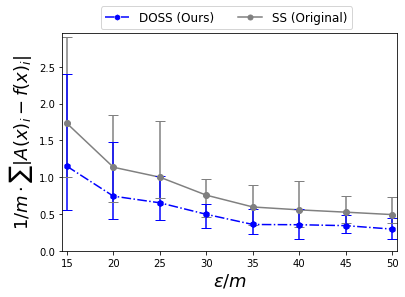

In [7]:
n = 150; m = 1

acc = np.zeros((8,2))
max_acc = np.zeros((8,2)); min_acc = np.ones((8,2))
sum_acc = np.zeros((8,2))

x = DOSS_TDT_test(n,4)

DOLSP = np.zeros((20,m)); DOLSN = np.zeros((20,m))
for i in range(20):
    DOLSP[i], DOLSN[i] = DOLS_TDT(x,n,m)

jj = 10
for j in range(jj):
    acc = accuracy(n,m,DOLSP,DOLSN)
    for i in range(8):
        for k in range(2):
            max_acc[i][k] = max(max_acc[i][k], acc[i][k])
            min_acc[i][k] = min(min_acc[i][k], acc[i][k])
            sum_acc[i][k] += acc[i][k]
    print(acc)
acc = sum_acc/jj

y_err = np.zeros((2,8,2))
for k in range(2):
    y_err[0,:,k] = acc[:,k] - min_acc[:,k]
    y_err[1,:,k] = max_acc[:,k] - acc[:,k]

ei = [15+5*i for i in range(8)]

print(acc)
fig = plt.figure()
plt.ylim(0, max(max_acc[i][j] for i in range(6) for j in range(2))+0.05)
plt.xlim(14.5, 50.5)
plt.plot(ei, acc[:,0], marker="h", markersize=5, color = "blue", linestyle = "dashdot", label = "DOSS (Ours)")
plt.plot(ei, acc[:,1], marker="o", markersize=5, color = "gray", linestyle = "-", label = "SS (Original)")
plt.errorbar(ei, acc[:,1], yerr = y_err[:,:,1], capsize=5, fmt='o', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.errorbar(ei, acc[:,0], yerr = y_err[:,:,0], capsize=5, fmt='h', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=2, fontsize=12)
plt.xlabel("$\epsilon/m$", fontsize = 18)
plt.ylabel("$1/m \cdot \sum |A(x)_i - f(x)_i|$", fontsize = 18)
fig.savefig("Accuracy_TDT_all_m=1.png")
fig.savefig("figs/Accuracy_TDT_all_m=1.eps", bbox_inches="tight", pad_inches=0.05)

[[1.45497572 1.54891031]
 [0.9522127  1.020397  ]
 [0.7509829  0.85713348]
 [0.67278124 0.75352394]
 [0.42154551 0.47992298]
 [0.53947485 0.60438899]
 [0.58355088 0.62444808]
 [0.30542361 0.36734292]]
[[1.42789956 1.61693678]
 [1.18010406 1.31081768]
 [0.80981569 0.90108904]
 [0.55416371 0.60700539]
 [0.49046955 0.58981189]
 [0.40637365 0.47291476]
 [0.35510558 0.40641453]
 [0.50578279 0.58398105]]
[[1.36858351 1.55937592]
 [0.92078725 1.01647239]
 [0.53613686 0.58712073]
 [0.47031799 0.62532021]
 [0.48696568 0.53823138]
 [0.33860559 0.38068657]
 [0.42873225 0.50583783]
 [0.25725363 0.29826989]]
[[0.98248096 1.10412188]
 [0.99403686 1.09496447]
 [0.83998742 1.01725731]
 [0.66046879 0.70642869]
 [0.37003205 0.42609985]
 [0.50870673 0.53963303]
 [0.37221964 0.40990307]
 [0.32097824 0.34536514]]
[[1.59814683 1.85764582]
 [1.17355927 1.37361134]
 [0.69254867 0.78806045]
 [0.75233558 0.84248162]
 [0.63348106 0.65484818]
 [0.49376658 0.56710525]
 [0.41945667 0.46920819]
 [0.39941302 0.453684

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[1.35499107 1.56460873]
 [0.81102445 0.94190492]
 [0.91294574 1.00783827]
 [0.68495655 0.79538638]
 [0.57304264 0.6122382 ]
 [0.57277668 0.66129575]
 [0.39532839 0.43083429]
 [0.45239923 0.51961755]]
[[1.33248782 1.49919867]
 [1.01578998 1.12793114]
 [0.76563103 0.86812237]
 [0.61615103 0.69203848]
 [0.52073449 0.58173842]
 [0.48388166 0.5394368 ]
 [0.42784385 0.4796738 ]
 [0.41335044 0.47487706]]


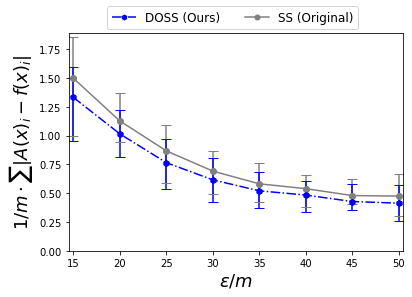

In [8]:
n = 150; m = 2

acc = np.zeros((8,2))
max_acc = np.zeros((8,2)); min_acc = np.ones((8,2))
sum_acc = np.zeros((8,2))

DOLSP = np.zeros((20,m)); DOLSN = np.zeros((20,m))
for i in range(20):
    DOLSP[i], DOLSN[i] = DOLS_TDT(x,n,m)

jj = 10
for j in range(jj):
    acc = accuracy(n,m,DOLSP,DOLSN)
    for i in range(8):
        for k in range(2):
            max_acc[i][k] = max(max_acc[i][k], acc[i][k])
            min_acc[i][k] = min(min_acc[i][k], acc[i][k])
            sum_acc[i][k] += acc[i][k]
    print(acc)
acc = sum_acc/jj

y_err = np.zeros((2,8,2))
for k in range(2):
    y_err[0,:,k] = acc[:,k] - min_acc[:,k]
    y_err[1,:,k] = max_acc[:,k] - acc[:,k]

ei = [15+5*i for i in range(8)]

print(acc)
fig = plt.figure()
plt.ylim(0, max(max_acc[i][j] for i in range(6) for j in range(2))+0.03)
plt.xlim(14.5, 50.5)
plt.plot(ei, acc[:,0], marker="h", markersize=5, color = "blue", linestyle = "dashdot", label = "DOSS (Ours)")
plt.plot(ei, acc[:,1], marker="o", markersize=5, color = "gray", linestyle = "-", label = "SS (Original)")
plt.errorbar(ei, acc[:,1], yerr = y_err[:,:,1], capsize=5, fmt='o', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.errorbar(ei, acc[:,0], yerr = y_err[:,:,0], capsize=5, fmt='h', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=2, fontsize=12)
plt.xlabel("$\epsilon/m$", fontsize = 18)
plt.ylabel("$1/m \cdot \sum |A(x)_i - f(x)_i|$", fontsize = 18)
fig.savefig("Accuracy_TDT_all_m=2.png")
fig.savefig("figs/Accuracy_TDT_all_m=2.eps", bbox_inches="tight", pad_inches=0.05)

[[1.32952575 1.4967073 ]
 [1.07615658 1.15335511]
 [1.11599842 1.21654561]
 [0.68589498 0.78431572]
 [0.48705722 0.52548664]
 [0.37561031 0.44438849]
 [0.39114198 0.43839482]
 [0.44888918 0.50038658]]
[[1.4548411  1.57890633]
 [1.0687034  1.13537407]
 [0.90675387 0.99460824]
 [0.55109223 0.59423047]
 [0.5587288  0.61355703]
 [0.44548371 0.48420365]
 [0.48499792 0.52972707]
 [0.31725913 0.34831838]]
[[1.50913718 1.70220487]
 [1.19542612 1.26637877]
 [0.51864813 0.56922827]
 [0.56845735 0.61991767]
 [0.54746021 0.58713591]
 [0.61346241 0.66529838]
 [0.32520864 0.34934587]
 [0.38666209 0.41716007]]
[[1.23014774 1.35970892]
 [0.77221401 0.88107083]
 [0.64532854 0.70485666]
 [0.80152077 0.89220195]
 [0.63292159 0.68548118]
 [0.41651198 0.46750697]
 [0.48393831 0.52630211]
 [0.36471134 0.40072026]]
[[1.47736448 1.6234308 ]
 [0.9007661  1.02491913]
 [0.56367117 0.64526237]
 [0.71831782 0.8202778 ]
 [0.77467488 0.82345812]
 [0.4300534  0.45980081]
 [0.42614129 0.47606937]
 [0.40839826 0.451067

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


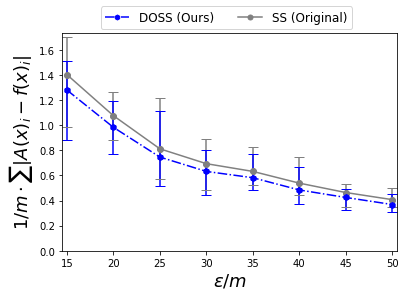

In [9]:
n = 150; m = 3

acc = np.zeros((8,2))
max_acc = np.zeros((8,2)); min_acc = np.ones((8,2))
sum_acc = np.zeros((8,2))

DOLSP = np.zeros((20,m)); DOLSN = np.zeros((20,m))
for i in range(20):
    DOLSP[i], DOLSN[i] = DOLS_TDT(x,n,m)

jj = 10
for j in range(jj):
    acc = accuracy(n,m,DOLSP,DOLSN)
    for i in range(8):
        for k in range(2):
            max_acc[i][k] = max(max_acc[i][k], acc[i][k])
            min_acc[i][k] = min(min_acc[i][k], acc[i][k])
            sum_acc[i][k] += acc[i][k]
    print(acc)
acc = sum_acc/jj

y_err = np.zeros((2,8,2))
for k in range(2):
    y_err[0,:,k] = acc[:,k] - min_acc[:,k]
    y_err[1,:,k] = max_acc[:,k] - acc[:,k]

ei = [15+5*i for i in range(8)]

print(acc)
fig = plt.figure()
plt.ylim(0, max(max_acc[i][j] for i in range(6) for j in range(2))+0.03)
plt.xlim(14.5, 50.5)
plt.plot(ei, acc[:,0], marker="h", markersize=5, color = "blue", linestyle = "dashdot", label = "DOSS (Ours)")
plt.plot(ei, acc[:,1], marker="o", markersize=5, color = "gray", linestyle = "-", label = "SS (Original)")
plt.errorbar(ei, acc[:,1], yerr = y_err[:,:,1], capsize=5, fmt='o', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.errorbar(ei, acc[:,0], yerr = y_err[:,:,0], capsize=5, fmt='h', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=2, fontsize=12)
plt.xlabel("$\epsilon/m$", fontsize = 18)
plt.ylabel("$1/m \cdot \sum |A(x)_i - f(x)_i|$", fontsize = 18)
fig.savefig("Accuracy_TDT_all_m=3.png")
fig.savefig("figs/Accuracy_TDT_all_m=3.eps", bbox_inches="tight", pad_inches=0.05)

[[1.26775866 1.36253029]
 [0.87892654 0.9556636 ]
 [0.7103432  0.75847519]
 [0.74785997 0.79354773]
 [0.54962894 0.58718567]
 [0.41488793 0.44944575]
 [0.41031654 0.44744822]
 [0.34272365 0.35804268]]
[[1.02988274 1.11273307]
 [0.97014797 1.04271415]
 [0.73811714 0.7993511 ]
 [0.55942362 0.60052261]
 [0.61906271 0.65747493]
 [0.38290461 0.40592048]
 [0.43956846 0.45501783]
 [0.40384333 0.43600969]]
[[1.20308544 1.27421814]
 [0.93407353 0.99540407]
 [0.69732617 0.7524195 ]
 [0.51320305 0.54375051]
 [0.4867906  0.50608268]
 [0.43900086 0.46553118]
 [0.44198793 0.4768856 ]
 [0.35742969 0.37696671]]
[[1.29340756 1.3700999 ]
 [0.90883037 0.99729647]
 [0.61656016 0.664612  ]
 [0.62121294 0.67243393]
 [0.59757864 0.63368472]
 [0.51585643 0.54879692]
 [0.48306682 0.52062114]
 [0.3598269  0.39589074]]
[[1.2799429  1.38019272]
 [0.946564   1.02379012]
 [0.85966145 0.94317374]
 [0.7917808  0.84022701]
 [0.62430186 0.65855631]
 [0.51369693 0.55258173]
 [0.38007754 0.41464656]
 [0.45868593 0.487483

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


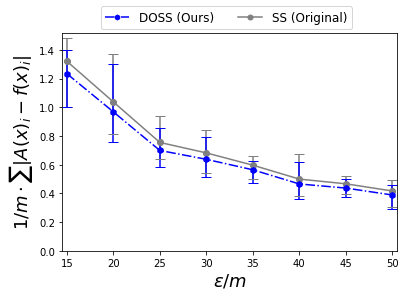

In [10]:
n = 150; m = 4

acc = np.zeros((8,2))
max_acc = np.zeros((8,2)); min_acc = np.ones((8,2))
sum_acc = np.zeros((8,2))

DOLSP = np.zeros((20,m)); DOLSN = np.zeros((20,m))
for i in range(20):
    DOLSP[i], DOLSN[i] = DOLS_TDT(x,n,m)

jj = 10
for j in range(jj):
    acc = accuracy(n,m,DOLSP,DOLSN)
    for i in range(8):
        for k in range(2):
            max_acc[i][k] = max(max_acc[i][k], acc[i][k])
            min_acc[i][k] = min(min_acc[i][k], acc[i][k])
            sum_acc[i][k] += acc[i][k]
    print(acc)
acc = sum_acc/jj

y_err = np.zeros((2,8,2))
for k in range(2):
    y_err[0,:,k] = acc[:,k] - min_acc[:,k]
    y_err[1,:,k] = max_acc[:,k] - acc[:,k]

ei = [15+5*i for i in range(8)]

print(acc)
fig = plt.figure()
plt.ylim(0, max(max_acc[i][j] for i in range(6) for j in range(2))+0.03)
plt.xlim(14.5, 50.5)
plt.plot(ei, acc[:,0], marker="h", markersize=5, color = "blue", linestyle = "dashdot", label = "DOSS (Ours)")
plt.plot(ei, acc[:,1], marker="o", markersize=5, color = "gray", linestyle = "-", label = "SS (Original)")
plt.errorbar(ei, acc[:,1], yerr = y_err[:,:,1], capsize=5, fmt='o', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.errorbar(ei, acc[:,0], yerr = y_err[:,:,0], capsize=5, fmt='h', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.legend(bbox_to_anchor=(0.49, 1.02), loc='lower center', borderaxespad=0, ncol=2, fontsize=12)
plt.xlabel("$\epsilon/m$", fontsize = 18)
plt.ylabel("$1/m \cdot \sum |A(x)_i - f(x)_i|$", fontsize = 18)
fig.savefig("Accuracy_TDT_all_m=4.png")
fig.savefig("figs/Accuracy_TDT_all_m=4.eps", bbox_inches="tight", pad_inches=0.05)